<a href="https://colab.research.google.com/github/LeoGaunt/csc2034_DataScience_WineQuality/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Model to predict the quality of wine


Clone the repository and change the directory

In [2]:
!git clone https://github.com/LeoGaunt/csc2034_DataScience_WineQuality.git

Cloning into 'csc2034_DataScience_WineQuality'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 0), reused 7 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 93.97 KiB | 1.57 MiB/s, done.


In [3]:
import os
os.chdir("csc2034_DataScience_WineQuality/data")

## Exploring the 2 Datasets

Now we have imported the datasets into collab, we can now explore the datasets and visualise them to help our understanding.

I will first look at how many wines are of each quality

I start this process by loading all the data in from the csv using the `pandas` module

In [4]:
import pandas as pd

# Load the Data
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

Now that we have loaded the data we can have a look at how many wines in both red and white are of which quality

In [5]:
# Check unique quality values
print(red_wine["quality"].value_counts().sort_index())
print(white_wine["quality"].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


We can now see the values of the qualities of each wine, however it would be much better if we could see this on a graph to visualise the data. I am going to use `matplotlib` to greate a histogram for this data

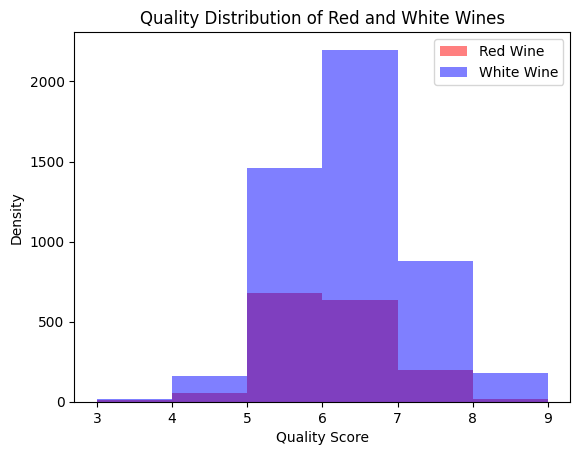

In [6]:
import matplotlib.pyplot as plt

# Plot the distributions

plt.hist(red_wine["quality"], alpha=0.5, label="Red Wine", color="red", bins=range(3, 10))
plt.hist(white_wine["quality"], alpha=0.5, label="White Wine", color="blue", bins=range(3, 10))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of Red and White Wines")
plt.show()

NEED TO DESCRIBE

### Comparing quality against alcohol content

We can do this by discretising the alcohol content variables into low, med and high based on its distribution. This will be decided by

* `low < (avg - stddev)`
* `(avg - stddev) < med < (avg + stddev)`
* `(avg + stddev) < high`

I do this by creating a 3-valued `alcohol_cat` variable. I will use `pd.cut()` to split the `DataFrames`, by using pre-calculated bins that act as the defining area to split.

In [9]:
red_bins = [0,
        (red_wine["alcohol"].mean() - red_wine["alcohol"].std()),
        (red_wine["alcohol"].mean() + red_wine["alcohol"].std()),
        float('inf')]

white_bins = [0,
        (white_wine["alcohol"].mean() - white_wine["alcohol"].std()),
        (white_wine["alcohol"].mean() + white_wine["alcohol"].std()),
        float('inf')]

labels = ["low", "med", "high"]

red_wine["alcohol_cat"] = pd.cut(red_wine["alcohol"], bins=red_bins, labels=labels)
white_wine["alcohol_cat"] = pd.cut(white_wine["alcohol"], bins=white_bins, labels=labels)

[0, 9.357315532599136, 11.488650696293922, inf]
[0, 9.283646480017284, 11.74488761553192, inf]


Now that the wines have been sorted into discrete bins, we can look at the raw values.

In [10]:
print(red_wine["alcohol_cat"].value_counts().sort_index())
print(white_wine["alcohol_cat"].value_counts().sort_index())

alcohol_cat
low      194
med     1125
high     280
Name: count, dtype: int64
alcohol_cat
low      845
med     3121
high     932
Name: count, dtype: int64


We can now describe the wine quality as we did earlier, but serperately for low, mid and high alcohol content.

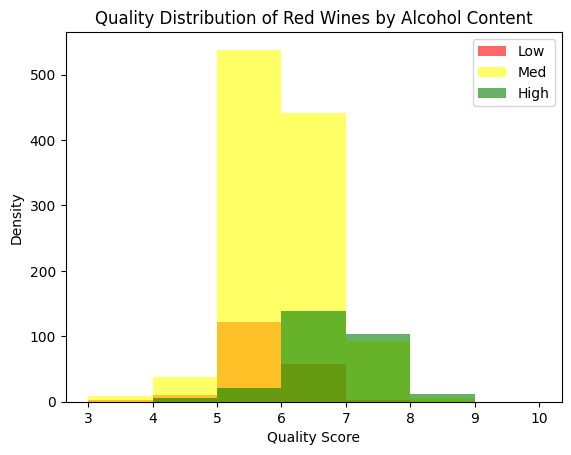

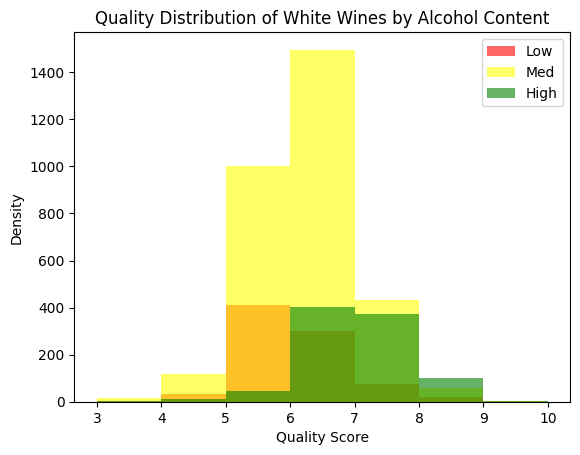

In [16]:
plt.hist(red_wine[red_wine["alcohol_cat"] == "low"]["quality"], alpha=0.6, label="Low", color="red", bins=range(3, 11))
plt.hist(red_wine[red_wine["alcohol_cat"] == "med"]["quality"], alpha=0.6, label="Med", color="yellow", bins=range(3, 11))
plt.hist(red_wine[red_wine["alcohol_cat"] == "high"]["quality"], alpha=0.6, label="High", color="green", bins=range(3, 11))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of Red Wines by Alcohol Content")
plt.show()

plt.hist(white_wine[white_wine["alcohol_cat"] == "low"]["quality"], alpha=0.6, label="Low", color="red", bins=range(3, 11))
plt.hist(white_wine[white_wine["alcohol_cat"] == "med"]["quality"], alpha=0.6, label="Med", color="yellow", bins=range(3, 11))
plt.hist(white_wine[white_wine["alcohol_cat"] == "high"]["quality"], alpha=0.6, label="High", color="green", bins=range(3, 11))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of White Wines by Alcohol Content")
plt.show()

DESCRIPTION NEEDED - As the graph has right skew (defo not right right term) this shows that higher alcohol content has a higher Quality Score

### Plotting the residual sugar variable and identify "sweet" and "dry" wines

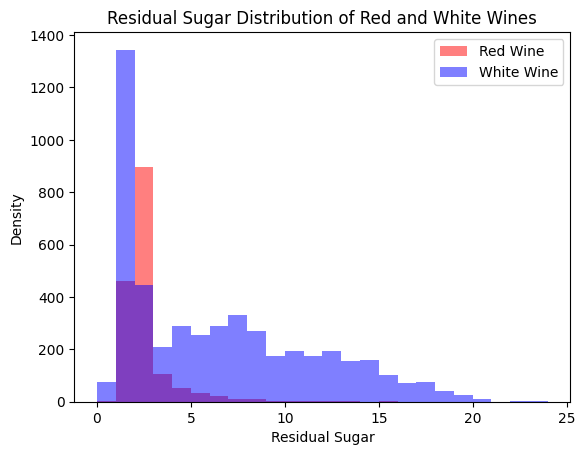

In [21]:
plt.hist(red_wine["residual sugar"], alpha=0.5, label="Red Wine", color="red", bins=range(0, 25))
plt.hist(white_wine["residual sugar"], alpha=0.5, label="White Wine", color="blue", bins=range(0, 25))
plt.legend(loc="upper right")
plt.xlabel("Residual Sugar")
plt.ylabel("Density")
plt.title("Residual Sugar Distribution of Red and White Wines")
plt.show()

Defining this now into sweet and dry. GOING TO USE QCUT HOWEVER DONT THINK THIS IS CORRECT I THINK I NEED TO FIND A THRESHOLD

In [23]:
red_wine["isSweet"] = pd.qcut(red_wine["residual sugar"], q=2, labels=[False, True])
white_wine["isSweet"] = pd.qcut(white_wine["residual sugar"], q=2, labels=[False, True])

### Distribution Analysis of Quality vs isSweet

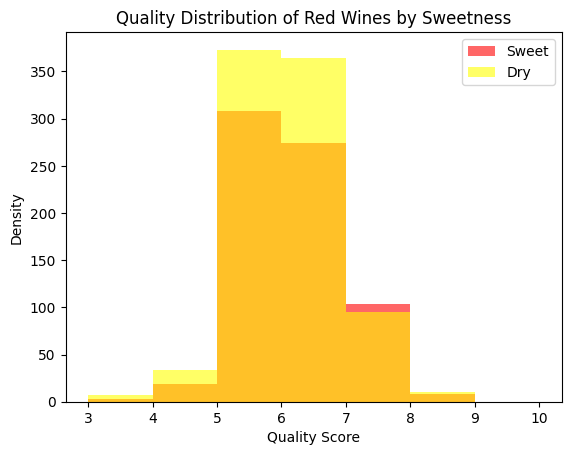

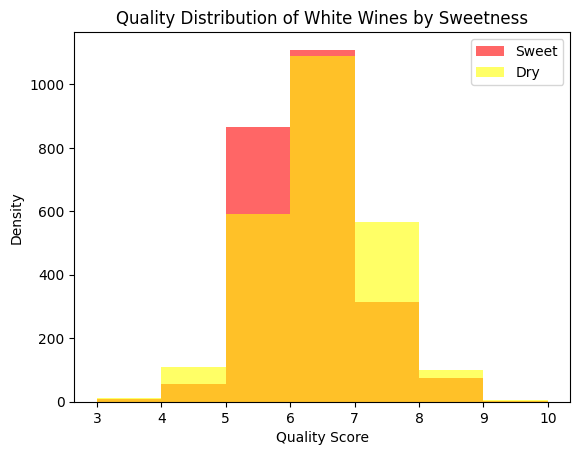

In [25]:
plt.hist(red_wine[red_wine["isSweet"] == True]["quality"], alpha=0.6, label="Sweet", color="red", bins=range(3, 11))
plt.hist(red_wine[red_wine["isSweet"] == False]["quality"], alpha=0.6, label="Dry", color="yellow", bins=range(3, 11))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of Red Wines by Sweetness")
plt.show()

plt.hist(white_wine[white_wine["isSweet"] == True]["quality"], alpha=0.6, label="Sweet", color="red", bins=range(3, 11))
plt.hist(white_wine[white_wine["isSweet"] == False]["quality"], alpha=0.6, label="Dry", color="yellow", bins=range(3, 11))
plt.legend(loc="upper right")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.title("Quality Distribution of White Wines by Sweetness")
plt.show()

DESCRIPTION NEEDED

## Determining which subset of variables is most useful for learning

For this part, I need to calculate the correlations between each pair the variables. I will do this by creating a Correlation Matrix. I will do this by using the `seaborn` package and displaying as a heatmap

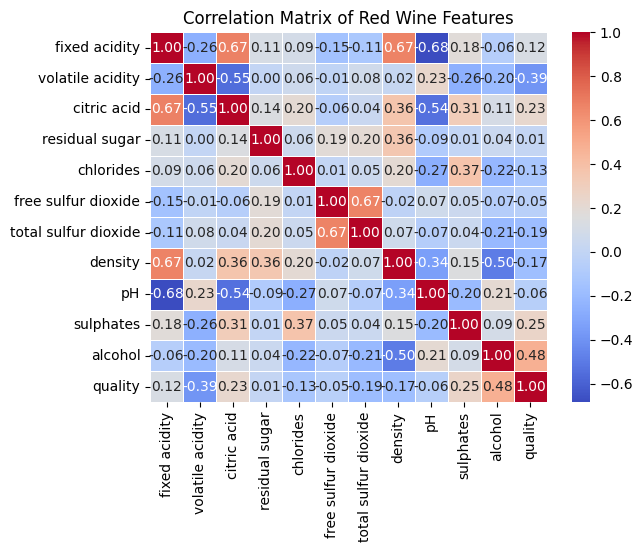

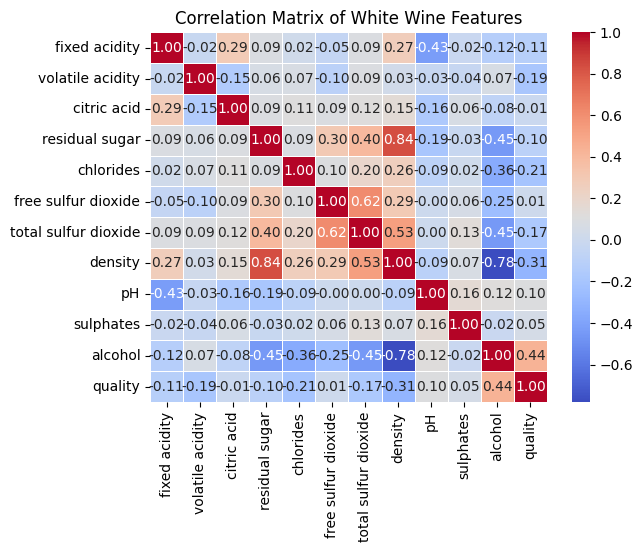

In [31]:
import seaborn as sns

corr_matrix_red = red_wine.corr(numeric_only=True) # NEED TO CHOOSE WHICH RANK COEFF TO USE
sns.heatmap(corr_matrix_red, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Red Wine Features")
plt.show()

corr_matrix_white = white_wine.corr(numeric_only=True) # NEED TO CHOOSE WHICH RANK COEFF TO USE
sns.heatmap(corr_matrix_white, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of White Wine Features")
plt.show()

COMMENT ON RELATIONSHIPS BETWEEN THEM

## Experiment with machine learning approaches